In [ ]:
# Decodes of CA and San Joaquin Valley Counties
ca_code = "06"
fresno_code = "019"
kern_code = "029"
kings_code = "031"
madera_code = "039"
merced_code = "047"
san_joaquin_code = "077"
stanislaus_code = "099"
tulare_code = "107"

In [ ]:
# Decodes of Pollutants
pm25 = "88101"
pm10 = "81102"
ozone = "44201"
no2 = "42602"
co = "42101"
so2 = "42401"

wind_speed = "61101"
wind_direction = "61102"
temperature = "62101"
rel_humidity = "62201"


In [ ]:
# import the libraries
import requests
import pandas as pd
import time

# show all columns of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)           # No line wrapping
pd.set_option('display.max_colwidth', None)


In [ ]:
# Initialize an empty DataFrame
fresno_df = pd.DataFrame()

# Loop over the years from 1980 to 2024
for year in range(1999, 2025):
    url = f"https://aqs.epa.gov/data/api/dailyData/byCounty?email=munkh-erdene.khuderbaatar@sjsu.edu&key=bluebird66&param={pm10},{pm25},{ozone},{no2},{co},{so2}&bdate={str(year) + '0101'}&edate={str(year) + '1231'}&state={ca_code}&county={fresno_code}"

    try:
        # Make the request
        response = requests.get(url)
        data = response.json()
        if data.get('Header', [])[0]['status'] == "Success":
            # Normalize the JSON data into a flat DataFrame
            current_year_data = pd.json_normalize(data.get('Data', []))

            # Concatenate the current year's data with the main DataFrame
            fresno_df = pd.concat([fresno_df, current_year_data], ignore_index=True)
            print(f"Added data for {year}")
        else:
            print(f"No data for {year}")

    except requests.exceptions.RequestException as e:
        # Handle any request-related errors (e.g., network issues)
        print(f"Request failed for {year}: {e}")

    # Wait for a short time before the next request (6 second)
    time.sleep(3)

# After the loop ends, you can process the `df` DataFrame
print("complete")
fresno_df.to_csv('fresno_df.csv', index=False)


# Testing Seasonality of the daily PM 2.5 AQI

<ipython-input-26-08eab5501583>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  longest_run_df['date_local'] = pd.to_datetime(longest_run_df['date_local'])


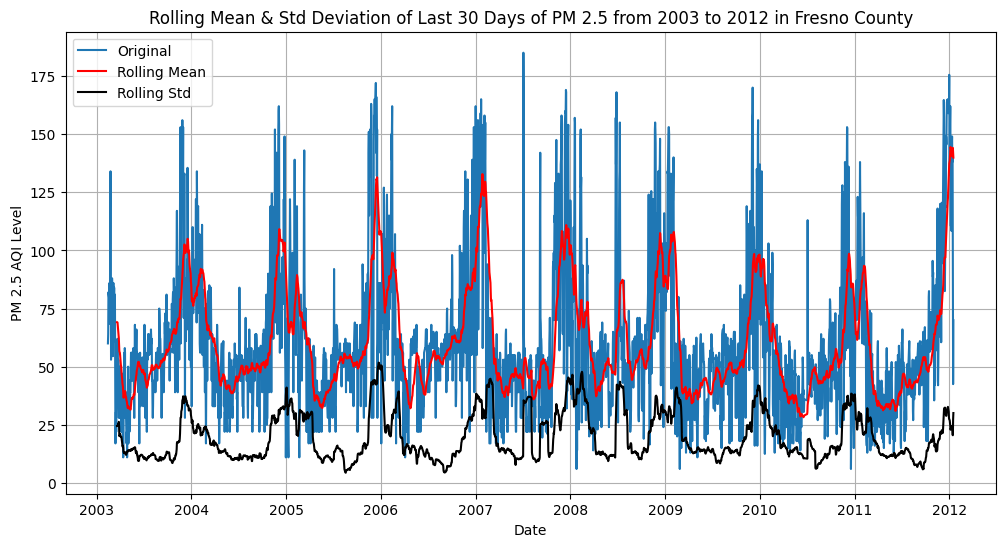

In [ ]:
# Assuming 'date' is the column with timestamps
longest_run_df['date_local'] = pd.to_datetime(longest_run_df['date_local'])
longest_run_df.set_index('date_local', inplace=True)

pm25 = longest_run_df["aqi_pm25"].dropna()
rolling_mean = pm25.rolling(window=30).mean()
rolling_std = pm25.rolling(window=30).std()

plt.figure(figsize=(12,6))
plt.plot(pm25, label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='black')

plt.legend()
plt.title('Rolling Mean & Std Deviation of Last 30 Days of PM 2.5 from 2003 to 2012 in Fresno County')
plt.ylabel("PM 2.5 AQI Level")
plt.xlabel("Date")   # Now the x-axis will display dates
plt.grid(True)
plt.show()

# Testing Seasonality After Applying Differencing

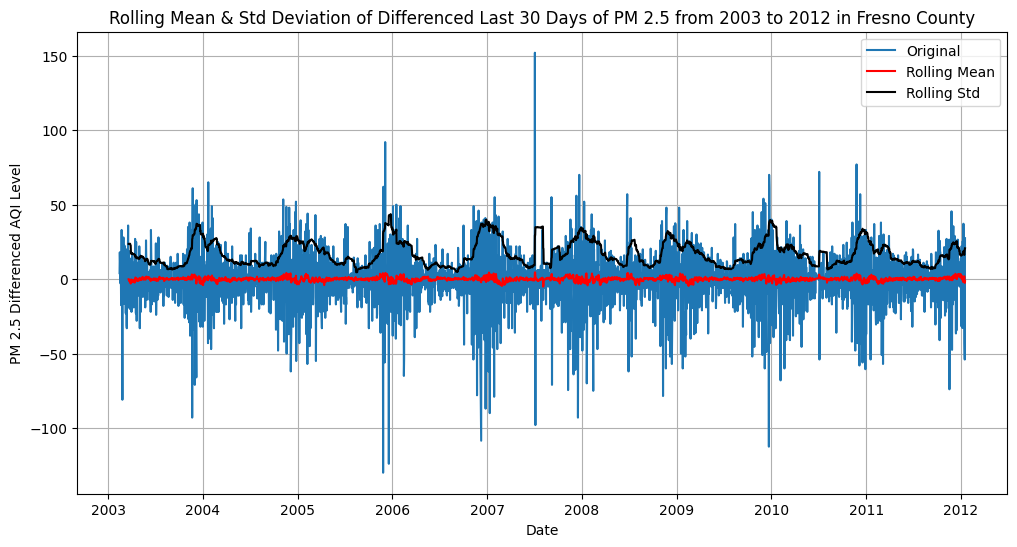

In [ ]:
pm25 = longest_run_df["aqi_pm25_diff"].dropna()
rolling_mean = pm25.rolling(window=30).mean()
rolling_std = pm25.rolling(window=30).std()

plt.figure(figsize=(12,6))
plt.plot(pm25, label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='black')

plt.legend()
plt.title('Rolling Mean & Std Deviation of Differenced Last 30 Days of PM 2.5 from 2003 to 2012 in Fresno County')
plt.ylabel("PM 2.5 Differenced AQI Level")
plt.xlabel("Date")
plt.grid(True)
plt.show()

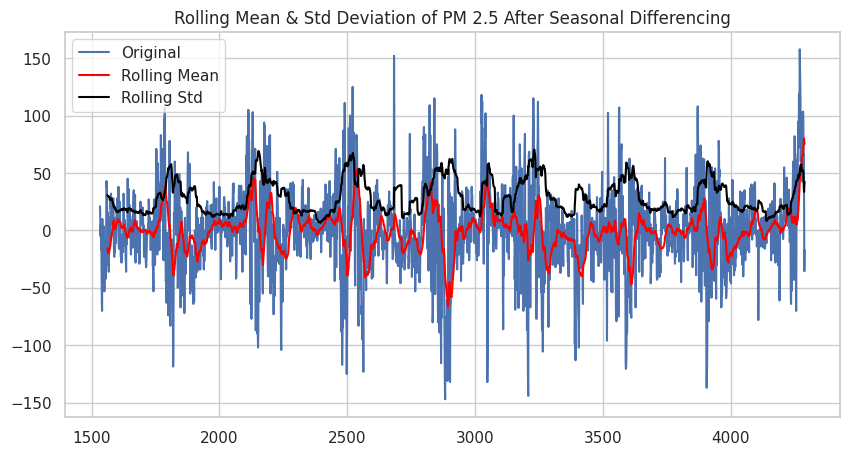

In [ ]:
rolling_mean = seasonal_diff_pm25.rolling(window=30).mean()
rolling_std = seasonal_diff_pm25.rolling(window=30).std()

plt.figure(figsize=(10,5))
plt.plot(seasonal_diff_pm25, label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='black')
plt.legend()
plt.title('Rolling Mean & Std Deviation of PM 2.5 After Seasonal Differencing')
plt.show()